In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
Url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(Url)

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic= titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


In [5]:
titanic.isnull().sum().count

<bound method Series.count of Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64>

#### Replacing nan values in Age feature

In [6]:
titanic['Age'].mean()

29.69911764705882

In [7]:
Pclass1_grp =titanic[titanic['Pclass']==1]
age1 = Pclass1_grp['Age'].mean()
print('Pclass_1 passenger age-',age1)

Pclass_1 passenger age- 38.233440860215055


In [8]:
Pclass2_grp =titanic[titanic['Pclass']==2]
age2 = Pclass2_grp['Age'].mean()
print('Pclass_2 passenger age-',age2)

Pclass_2 passenger age- 29.87763005780347


In [9]:
Pclass_grp3 =titanic[titanic['Pclass']==3]
age3 = Pclass_grp3['Age'].mean()
print('Pclass_3 passenger age-',age3)

Pclass_3 passenger age- 25.14061971830986


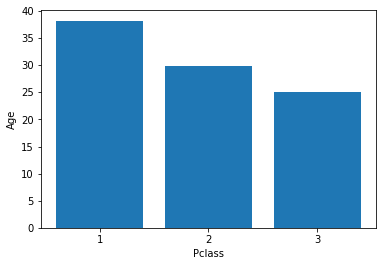

In [10]:
x = ['1','2','3']
y = [age1,age2,age3]
plt.bar(x,y)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

In [11]:
def Age_Impute(cols):
    pclass = cols['Pclass']
    age = cols['Age']
    
    if pd.isnull(age):
        if pclass == 1:
            return age1
        if pclass == 2:
            return age2
        if pclass == 3:   
            return age3
    else:
        return age

In [12]:
titanic['Age']=titanic[['Pclass','Age']].apply(Age_Impute,axis=1)

<ipython-input-12-332fd8c2d155>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Age']=titanic[['Pclass','Age']].apply(Age_Impute,axis=1)


In [13]:
titanic['Age'].isnull().sum()

0

#### One Hot Encoding for Sex variable

In [14]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [15]:
titanic = titanic.drop('Sex',axis=1)

In [16]:
titanic.insert(1, "Sex", value = sex)

In [17]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,22.0,1,0,7.2500,0
1,1,0,38.0,1,0,71.2833,1
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,0


#### Detecting and removing the outlier using Z-Score in dataset 

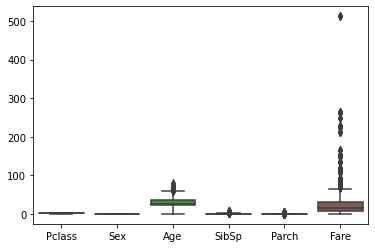

In [18]:
import seaborn as sns
sns.boxplot(data = titanic.drop('Survived',axis=1))

In [20]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(titanic.drop('Survived',axis=1)))
print(z)

[[0.82737724 0.73769513 0.55236029 0.43279337 0.47367361 0.50244517]
 [1.56610693 1.35557354 0.65947522 0.43279337 0.47367361 0.78684529]
 [0.82737724 1.35557354 0.24940141 0.4745452  0.47367361 0.48885426]
 ...
 [0.82737724 1.35557354 0.31449064 0.43279337 2.00893337 0.17626324]
 [1.56610693 0.73769513 0.24940141 0.4745452  0.47367361 0.04438104]
 [0.82737724 0.73769513 0.20503691 0.4745452  0.47367361 0.49237783]]


In [24]:
threshold = 3
print(np.where(z > 3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
       4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
       3, 3, 2, 4, 3, 4], dtype=int64))


In [26]:
z[13][4]

5.73284383018578

In [28]:
titanic_o = titanic[(z < 3).all(axis=1)]

In [30]:
titanic.shape

(891, 7)

In [31]:
titanic_o.shape

(820, 7)

#### Decision Tree Model 

In [61]:
X = titanic_o.iloc[:,:6]
y = titanic_o['Survived']


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [64]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [65]:
y_pred = model.predict(X_test)

#### Classification Report

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       173
           1       0.75      0.76      0.75        98

    accuracy                           0.82       271
   macro avg       0.80      0.81      0.80       271
weighted avg       0.82      0.82      0.82       271



In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8191881918819188

#### Confusion Matrix

In [68]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[148  25]
 [ 24  74]]


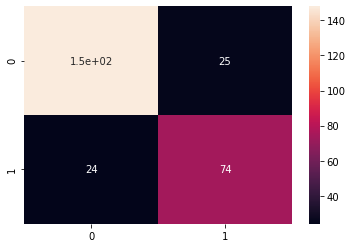

In [69]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)